In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [90]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# contiene la etiqueta que indica si el alumno ingreso o no a la universidad.
data = np.loadtxt('/content/drive/MyDrive/regresion_logistica.txt', delimiter=',')
X, y = data[:, 0:2], data[:, 2]
print(X)
print(y)

[[ 6.6  7.2]
 [ 5.4  6.9]
 [ 9.9  6.2]
 [ 5.3  3.2]
 [ 6.7  4.4]
 [ 5.3  4.1]
 [ 3.4  4.8]
 [ 5.3  9.4]
 [ 8.8  7.5]
 [ 6.9  7.1]
 [ 9.   8.9]
 [ 4.   9.7]
 [ 9.2  3.3]
 [ 7.7  4.7]
 [ 8.5  6.8]
 [ 3.7  7.1]
 [ 5.2  8.6]
 [ 2.   7.1]
 [ 3.   3.3]
 [ 4.7  2.8]
 [ 2.   7.2]
 [ 2.4  8.6]
 [ 4.   6.6]
 [ 5.4  4. ]
 [ 4.4  1.2]
 [ 7.8  9.4]
 [ 3.1  9.4]
 [ 6.4  1.4]
 [ 7.9  3.5]
 [ 5.   5.1]
 [ 9.6  6.7]
 [ 4.8  4.2]
 [ 1.8  2.9]
 [ 8.8  7.5]
 [ 9.7  1.3]
 [ 1.3  4. ]
 [ 2.7  3. ]
 [ 1.3  6.6]
 [ 1.2  3.1]
 [ 4.9  5.5]
 [ 8.8  5. ]
 [ 4.6  9.3]
 [ 6.3  7.3]
 [ 5.4  5. ]
 [ 4.4  9.4]
 [ 7.7  4.8]
 [ 6.6  3.9]
 [ 7.5  3.9]
 [ 2.1  1.6]
 [ 3.4  5.5]
 [ 6.3  2.4]
 [ 1.   6. ]
 [ 6.7  7.8]
 [ 1.5  6.3]
 [ 4.3  7.3]
 [ 4.4  6.4]
 [ 3.6  5. ]
 [ 9.3  3.5]
 [ 7.2  5.6]
 [ 4.6  1.4]
 [ 6.3  7.5]
 [ 1.3  9.9]
 [ 3.6  9.6]
 [ 4.1  5.4]
 [ 5.7  6.6]
 [ 8.3  6.9]
 [ 2.5  2.5]
 [ 6.6  5.3]
 [ 1.7  9. ]
 [ 7.7  6.7]
 [ 4.3  2.2]
 [ 4.5  4.5]
 [ 7.8  1.5]
 [ 3.8  9. ]
 [ 5.4  6.2]
 [ 3.9  6.7]
 [ 9.2  3.7]

In [91]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y 
    # o para los negativos.
    
    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

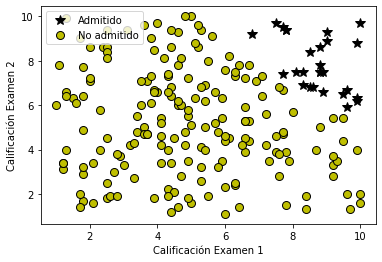

In [92]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Calificación Examen 1')
pyplot.ylabel('Calificación Examen 2')
pyplot.legend(['Admitido', 'No admitido'])
pass

In [93]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [94]:
# Prueba la implementacion de la funcion sigmoid
z = 21
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 21 ) =  0.9999999992417439


In [95]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [96]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [97]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-4.93161736  0.35684906  0.18573782]
Un estudiante con nota del examen 1: 80 y nota del examen 2: 46 (usando el descenso por el gradiente):0


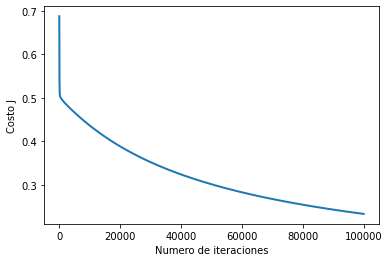

In [98]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 7.8, 6.1]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('Un estudiante con nota del examen 1: 80 y nota del examen 2: 46 (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [99]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

In [100]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[0.37142857 1.57880952 1.75785714]
Gradiente en theta inicial (zeros):
	[0.3714, 1.5788, 1.7579]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [101]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-24.    0.2   0.2]
Costo en theta prueba: 2.660
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[-0.129, -1.119, -1.011]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


In [102]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.011
Costo esperado (aproximado): 0.203

theta:
	[-119.132, 7.880, 7.945]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [103]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([1, 13])
        pyplot.ylim([1, 13])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

[-1. 12.]
[15.98622629  3.09251397]


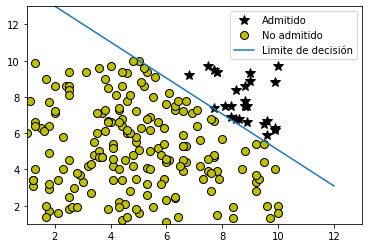

In [104]:
#Graficar limites
plotDecisionBoundary(plotData, theta, X, y)

In [105]:
#defincion de funcion para predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida
def predict(theta, X):
    """
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [109]:
#Predice la probabilidad de:
#pasar a la siguiente ronda para un participante con una calificacion del juez 1 de 9.1
#pasar a la siguiente ronda para un participante con una calificacion del juez 2 de 8.8
prob = sigmoid(np.dot([1, 9.1, 8.8], theta))
print('Para un paritipante con calificaciones de: juez 1: 9.1 y juez 2: 8.8, se predice una probabilidad de pasar a la siguiente ronde de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para un paritipante con calificaciones de: juez 1: 9.1 y juez 2: 8.8, se predice una probabilidad de pasar a la siguiente ronde de: 1.000%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 100.00 %
Precisión esperada (aproximadamente): 89.00 %
